Title: DSC355 Project Milestone 4   
Author: Caleb Trimble  
Date: 09 February 2025  
Description: Provides exploratory data analysis on U.S. Energy Information Administration data. Includes summary statistics, correlations, relationships, and various insights on the results. Milestone 4 update includes Linear Regression model and model evaluation. 


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

eia_df = pd.read_csv('C:\\Users\\caleb\\PycharmProjects\\DSC355\\dsc355\\Project\\EIA_DataSet.csv')
print(eia_df.head())
print('Summary Statistics\n:', eia_df.describe())

      Month     all_fuels         coal   natural_gas    nuclear  \
0  Sep 2024  359190.12336  54526.03971  169381.95779  62660.468   
1  Aug 2024  423354.76880  68838.49823  203094.01491  69760.288   
2  Jul 2024  430287.61059  71686.64222  207734.76505  69885.242   
3  Jun 2024  389865.06496  61393.13449  169314.98470  68192.147   
4  May 2024  345572.23763  45914.36348  143620.52827  64972.965   

   hydroelectric         wind        solar  
0    16659.96653  28909.93390  27641.88442  
1    21358.53278  28695.17877  32401.97221  
2    21186.47612  27909.95539  32919.38191  
3    21170.45994  38061.21381  32816.51567  
4    22613.08942  38589.04744  30724.28449  
Summary Statistics
:            all_fuels           coal    natural_gas       nuclear  \
count     285.000000     285.000000     285.000000    285.000000   
mean   338762.769632  124196.220554   97032.609941  65841.689646   
std     35430.747654   41688.448838   36726.035704   4774.482184   
min    278078.871000   37323.49847

## Data Source and Description ##

**Source**: U.S. Energy Information Administration  
**Description**: Monthly records of electricity consumption by energy type.  
**Continuous Variables**: Consumption amounts (in kilowatt-hours (kwh)).  
**Categorical Variables**: Energy types, months, years

In [2]:
eia_df['Month'] = pd.to_datetime(eia_df['Month'], format='%b %Y', errors='coerce')
eia_df = eia_df.dropna() 

# Creating a copy of the original values
original_values = eia_df.copy()

# Separating the data into two DataFrames: Natural and Renewable energy sources
natural_df = eia_df[['Month', 'coal', 'nuclear', 'natural_gas']]
renewable_df = eia_df[['Month', 'solar', 'wind', 'hydroelectric']]

print('Natural Energy Sources DataFrame:\n', natural_df.head())
print('Renewable Energy Sources DataFrame:\n', renewable_df.head())

# Scaling the numeric columns (optional)
numeric_columns = eia_df.select_dtypes(include=[np.number]).columns
scaler = MinMaxScaler()
eia_df[numeric_columns] = scaler.fit_transform(eia_df[numeric_columns])

Natural Energy Sources DataFrame:
        Month         coal    nuclear   natural_gas
0 2024-09-01  54526.03971  62660.468  169381.95779
1 2024-08-01  68838.49823  69760.288  203094.01491
2 2024-07-01  71686.64222  69885.242  207734.76505
3 2024-06-01  61393.13449  68192.147  169314.98470
4 2024-05-01  45914.36348  64972.965  143620.52827
Renewable Energy Sources DataFrame:
        Month        solar         wind  hydroelectric
0 2024-09-01  27641.88442  28909.93390    16659.96653
1 2024-08-01  32401.97221  28695.17877    21358.53278
2 2024-07-01  32919.38191  27909.95539    21186.47612
3 2024-06-01  32816.51567  38061.21381    21170.45994
4 2024-05-01  30724.28449  38589.04744    22613.08942


## Milestone 3 Feature Engineering ##

**Conversions**:  
   * Convert 'Month' to datetime format (Month and Year)  
  
**Missing Values**:   
   * Use "dropna" function to drop any missing values.  

**Normalization**:   
   * Exclude non-numeric columns and use scaler from scikit learn to normalize data.   
   * Scaled numerical columns back after normalization for readability and logical representation (decimal for kwh is nonsensical). 

In [3]:
def categorize_energy(df, energy_sources):
    for source in energy_sources:
        quartiles = df[source].quantile([0.25, 0.5, 0.75]).tolist()
        bins = [df[source].min()] + quartiles + [df[source].max() + 1e-8]
        labels = ['Low', 'Medium', 'High', 'Very High']
        df[source + '_category'] = pd.cut(df[source], bins=bins, labels=labels, include_lowest=True)
    return df

# Categorize natural energy sources
natural_sources = ['coal', 'nuclear', 'natural_gas']
natural_df = categorize_energy(natural_df, natural_sources)

# Categorize renewable energy sources
renewable_sources = ['solar', 'wind', 'hydroelectric']
renewable_df = categorize_energy(renewable_df, renewable_sources)

print('Categorized Natural Energy Sources DataFrame:\n', natural_df.head())
print('Categorized Renewable Energy Sources DataFrame:\n', renewable_df.head())

Categorized Natural Energy Sources DataFrame:
        Month         coal    nuclear   natural_gas coal_category  \
0 2024-09-01  54526.03971  62660.468  169381.95779           Low   
1 2024-08-01  68838.49823  69760.288  203094.01491        Medium   
2 2024-07-01  71686.64222  69885.242  207734.76505        Medium   
3 2024-06-01  61393.13449  68192.147  169314.98470           Low   
4 2024-05-01  45914.36348  64972.965  143620.52827           Low   

  nuclear_category natural_gas_category  
0              Low            Very High  
1        Very High            Very High  
2        Very High            Very High  
3             High            Very High  
4           Medium            Very High  
Categorized Renewable Energy Sources DataFrame:
        Month        solar         wind  hydroelectric solar_category  \
0 2024-09-01  27641.88442  28909.93390    16659.96653      Very High   
1 2024-08-01  32401.97221  28695.17877    21358.53278      Very High   
2 2024-07-01  32919.38191  

C:\Users\caleb\AppData\Local\Temp\ipykernel_18920\3627812259.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[source + '_category'] = pd.cut(df[source], bins=bins, labels=labels, include_lowest=True)
C:\Users\caleb\AppData\Local\Temp\ipykernel_18920\3627812259.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[source + '_category'] = pd.cut(df[source], bins=bins, labels=labels, include_lowest=True)
C:\Users\caleb\AppData\Local\Temp\ipykernel_18920\3627812259.py:6: SettingWithCopyWarning: 
A value 

## Data Binning ##  

**Sources**:  
   * List sources to be binned.  

**Binning**:    
   * Split the categories into quartiles to measure the amount of consumption comparatively.  
   * Define the labels for the bins (Low, Medium, High, Very High)  
   * Use pd.cut to categorize the source. 
 
**Reorganize Columns**:  
   * Ordered the categories with their associated sources for readability and easier association.     

In [4]:
# Handling Missing Values
missing_values = eia_df.isnull().sum()
print("Missing Values:\n", missing_values)
duplicate_values = eia_df.duplicated().sum()
print("Duplicate Values:\n", duplicate_values)

Missing Values:
 Month            0
all_fuels        0
coal             0
natural_gas      0
nuclear          0
hydroelectric    0
wind             0
solar            0
dtype: int64
Duplicate Values:
 0


**Missing Values**: The only category with missing values is solar (all) with 156 missing values. All other categories have no missing values.  
**Duplicate Values**: There are no duplicate values found in the dataset.

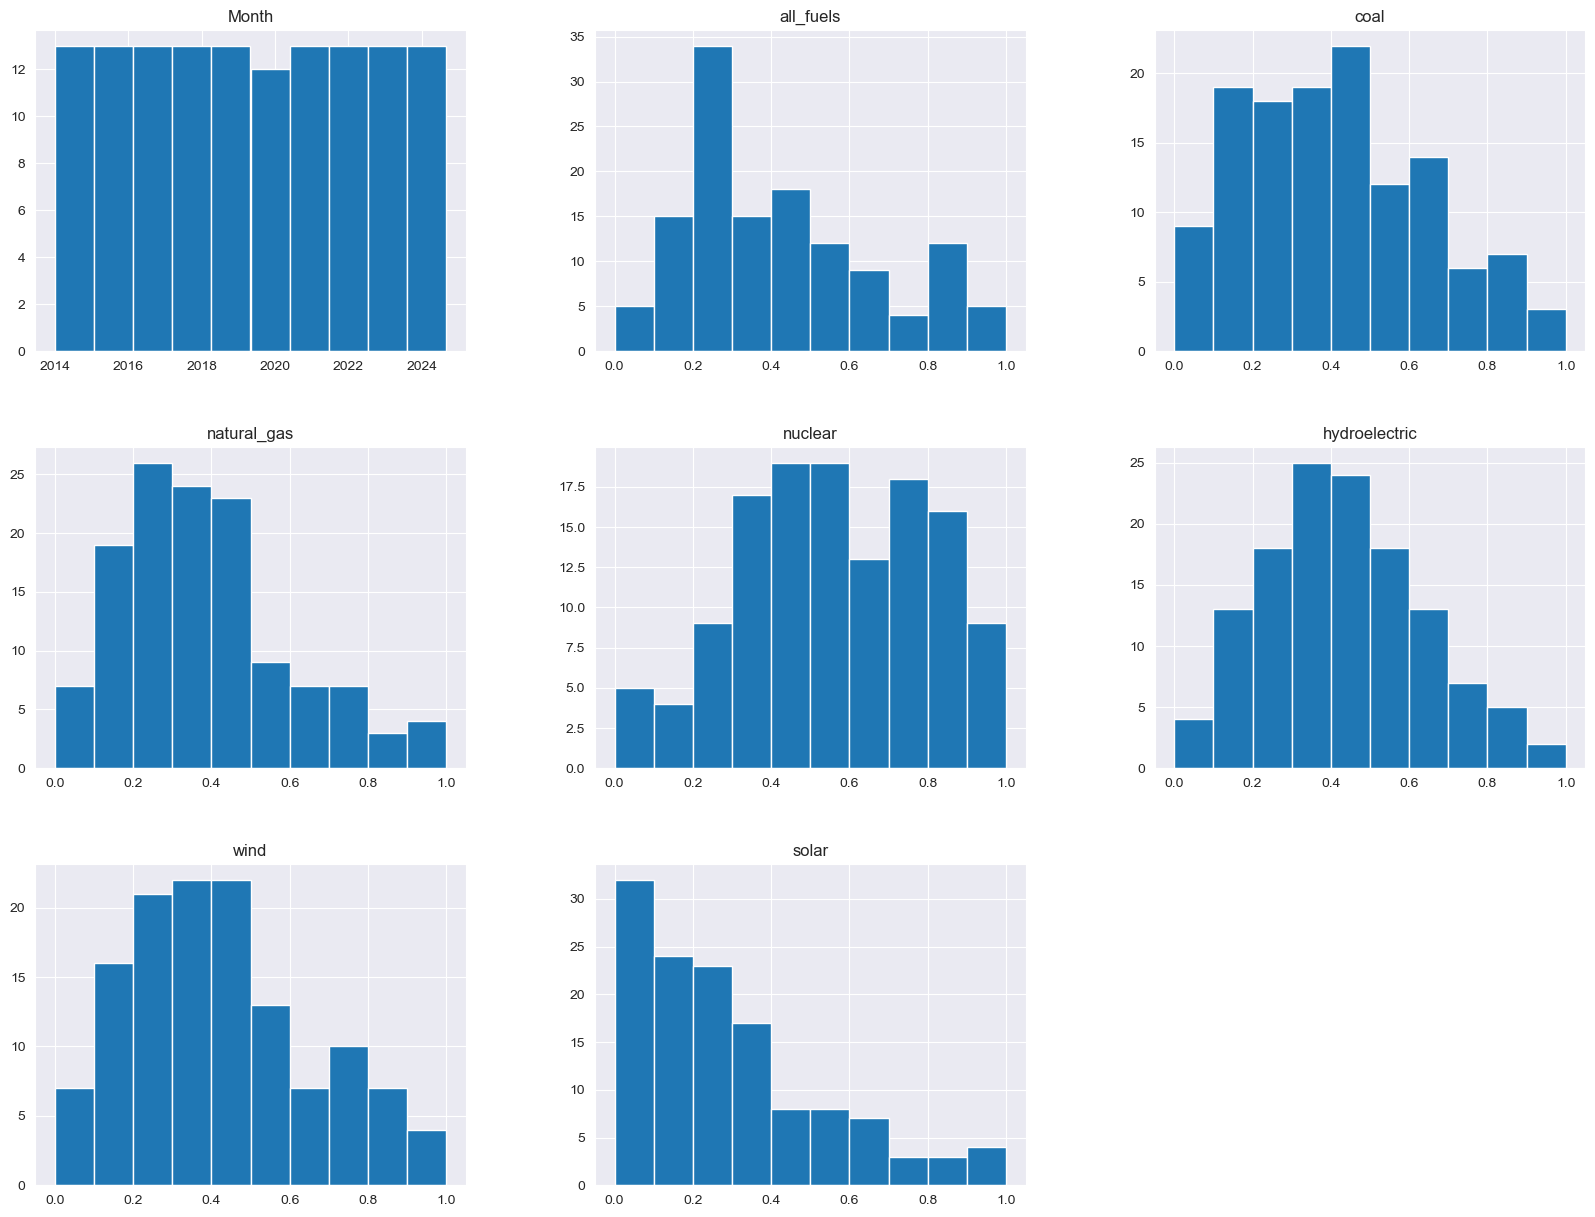

In [5]:
eia_df.hist(figsize=(20,15))
plt.show()


**Distribution**:  
`all_fuels (utility scale)`: Right-skewed, suggesting consumption tends to fall on the lower-end of the scale rather than the higher.  
`coal`: Relatively uniform with a slight concentration of values between 200k and 600k.
`natural_gas`: Significantly right-skewed, with the peak being around 125k kwh consumed.
`nuclear`: Slightly left-skewed, with the peak being around 62.5k kwh. Another significant peak can be seen between 70k and 72.5k kwh.  
`hydroelectric (conventional)`: Symmetric, with the peak being between 20k and 22.5k kwh.  
`wind`: Heavily right-skewed, with a significant decrease in consumption after the initial peak being between 0 and 10k kwh.  
`solar (all)`: Heavily right-skewed, with the beak being between 0 and 5k kwh. Gradually decreases within the first 15k, and significantly dropping after that.

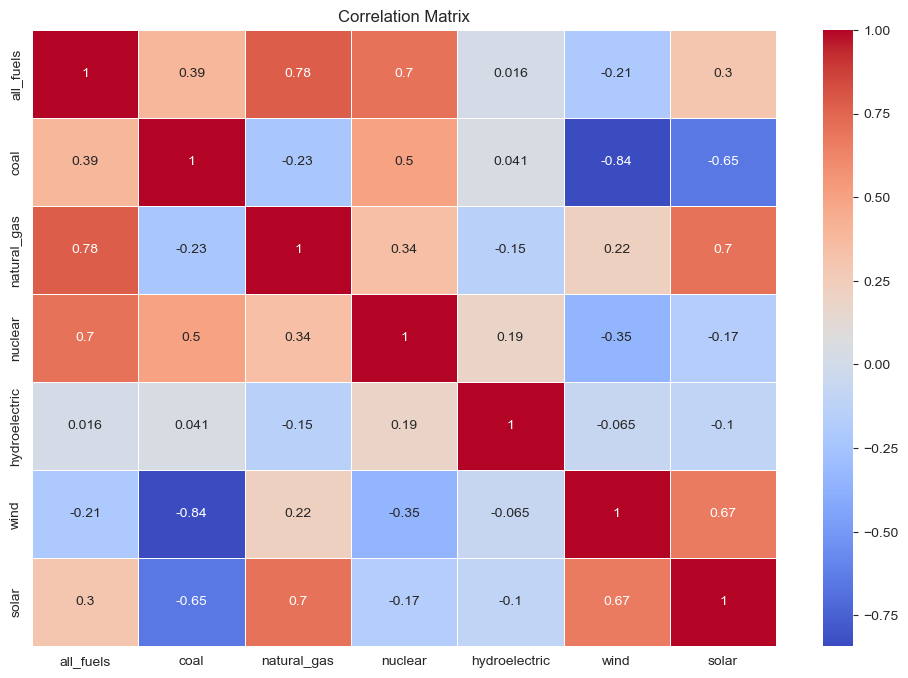

In [6]:
# Exclude non-numeric columns for correlation matrix
numeric_df = eia_df.select_dtypes(include=[float, int])

# Compute the correlation matrix
correlation_matrix = numeric_df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Correlation Matrix')
plt.show()

**Relationships**:  
*`All Fuels`*: Positively correlated with multiple sources, especially Nuclear and Natural Gas.  
*`Coal`*: Strong negative correlation with Wind and Natural Gas, indicating that when coal consumption increases, wind and natural gas consumption tend to decrease, and vice versa.  
*`Natural Gas`*: Strong positive correlations with Wind and Solar, suggesting that these sources tend to increase together.  
*`Nuclear`*: Weak positive correlations with Hydroelectric and weak negative correlations with Wind and Solar.  
*`Wind` and `Solar`*: Strongly positively correlated, indicating they often increase together.  

**Insight**: A strong negative correlation between Coal and Wind suggests that policies promoting wind energy might reduce coal consumption. Positive correlations such as between Natural Gas, Wind, and Solar suggest that while coal consumption decreases with wind and solar energy, natural gas also increase, taking a load off of coal consumption.

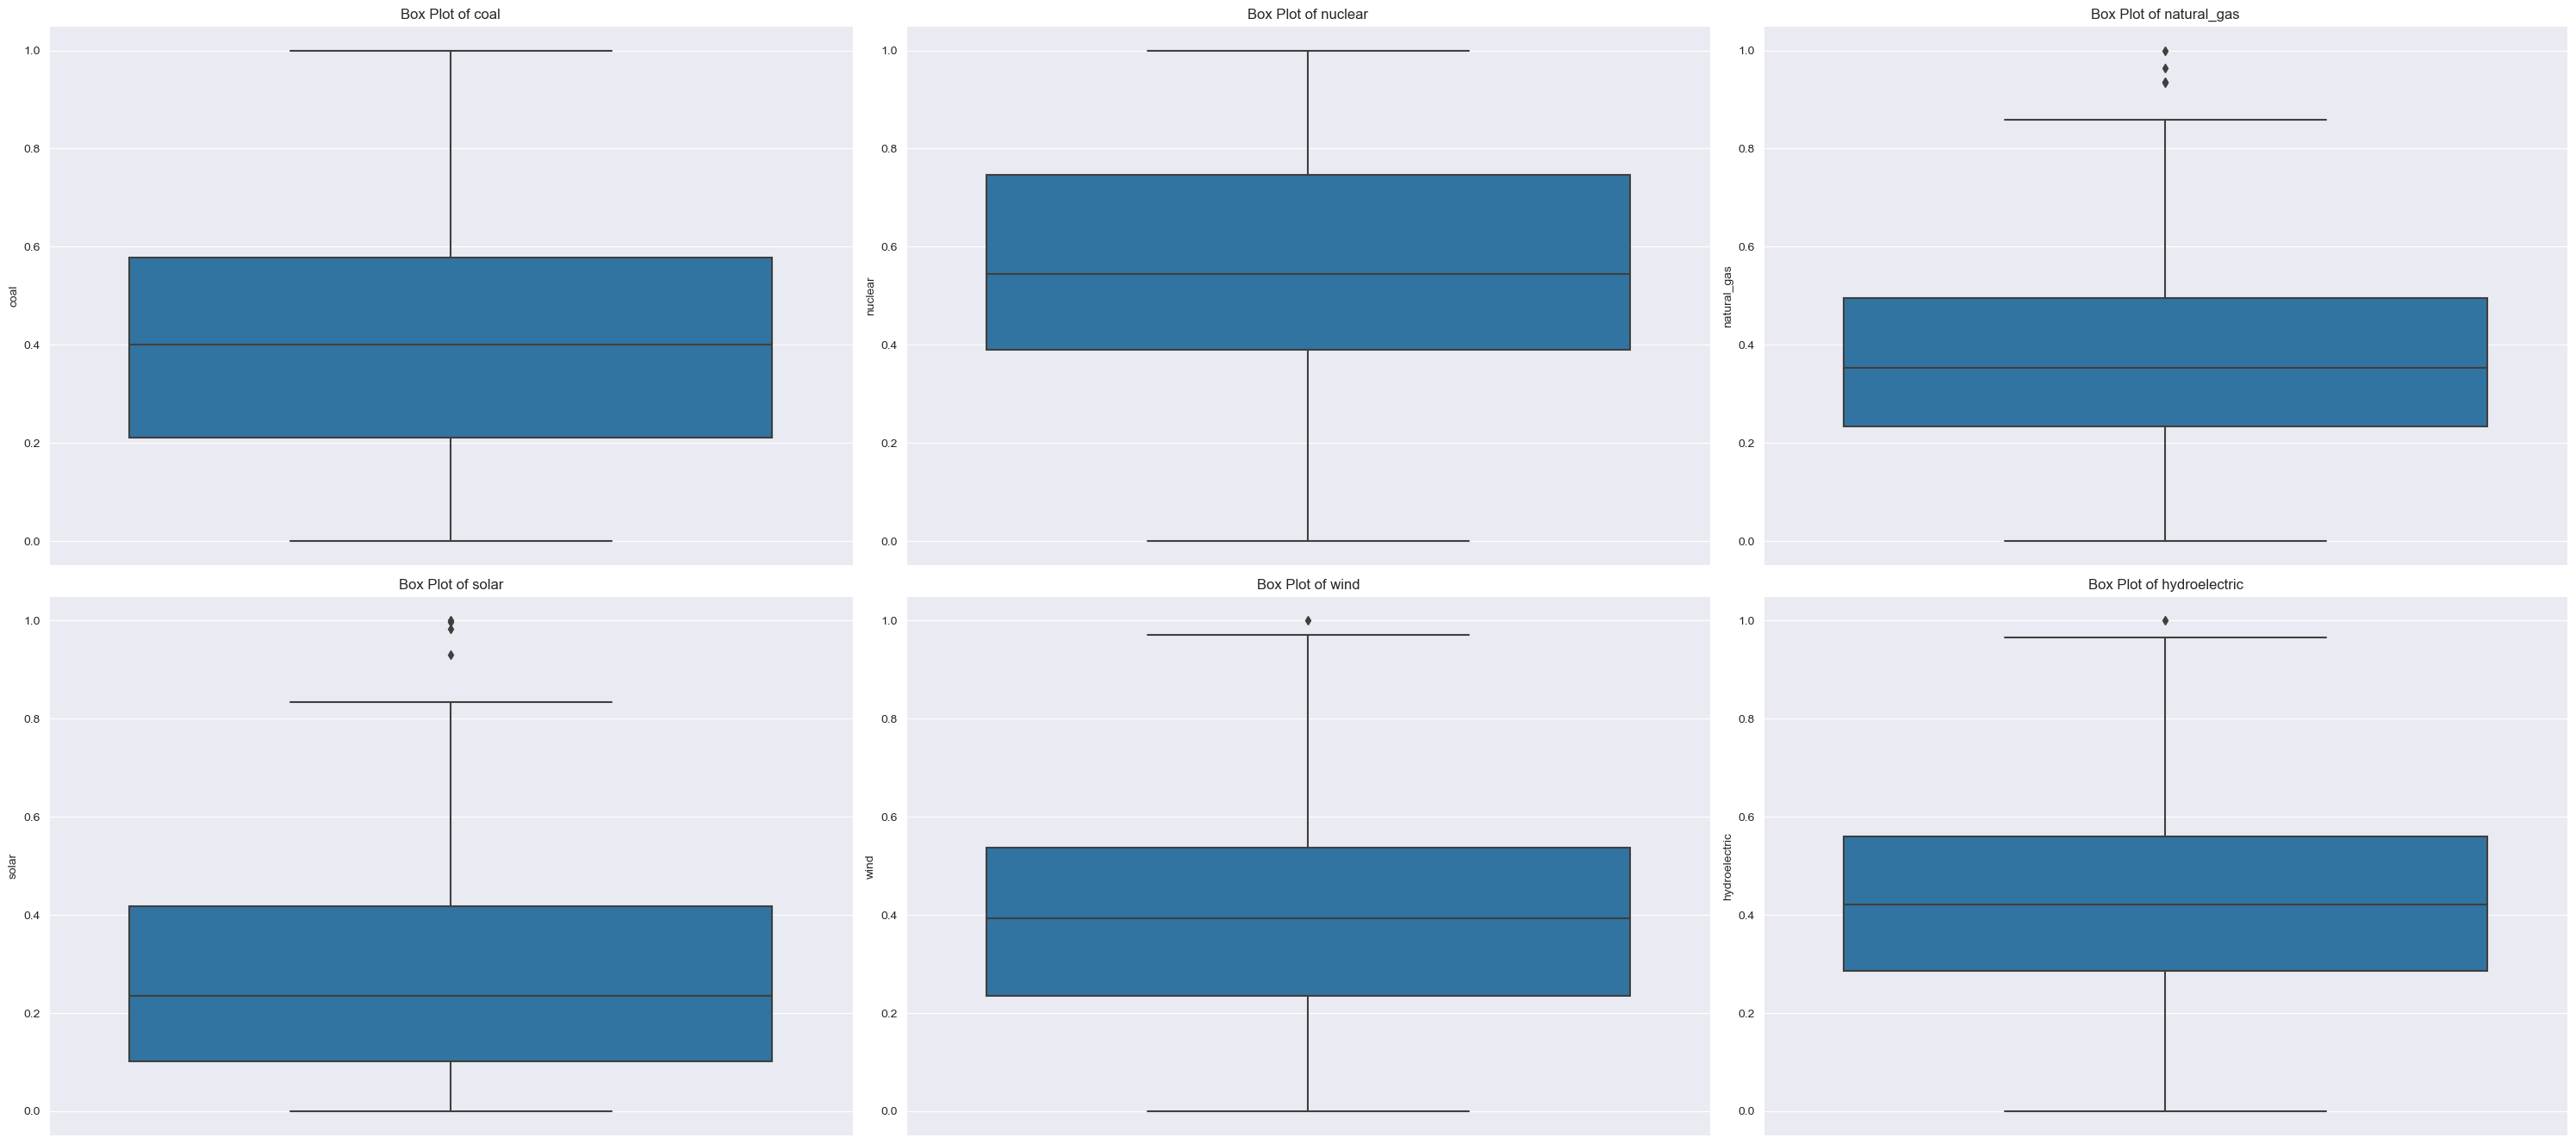

In [8]:
energy_sources = ['coal', 'nuclear', 'natural_gas', 'solar', 'wind', 'hydroelectric']

plt.figure(figsize=(30,20)) 
for i, col in enumerate(energy_sources): 
    plt.subplot(len(energy_sources) // 3 + 1, 3, i+1) 
    sns.boxplot(y=eia_df[col]) 
    plt.title(f'Box Plot of {col}') 
plt.tight_layout()
plt.show()

**Outliers**  
*`Natural Gas`*: One outlier about 200k, indicating unusually high consumption.  
*`Solar`*: Two outliers above 30k, suggesting two unusually high consumption periods.

**Observations**  
*Consistency*: Fuel types like Nuclear and Hydroelectric show consistent consumption values with tight IQRs and no outliers.

*Variability*: Wind and Solar exhibit more variability in consumption, as indicated by broader IQRs and the presence of outliers.

*Stable vs. Variable Sources*: Stable sources (e.g., Coal, Nuclear) provide a consistent supply, while renewable sources (e.g., Wind, Solar) can be more variable due to external factors like weather conditions.

C:\Users\caleb\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\caleb\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\caleb\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\caleb\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

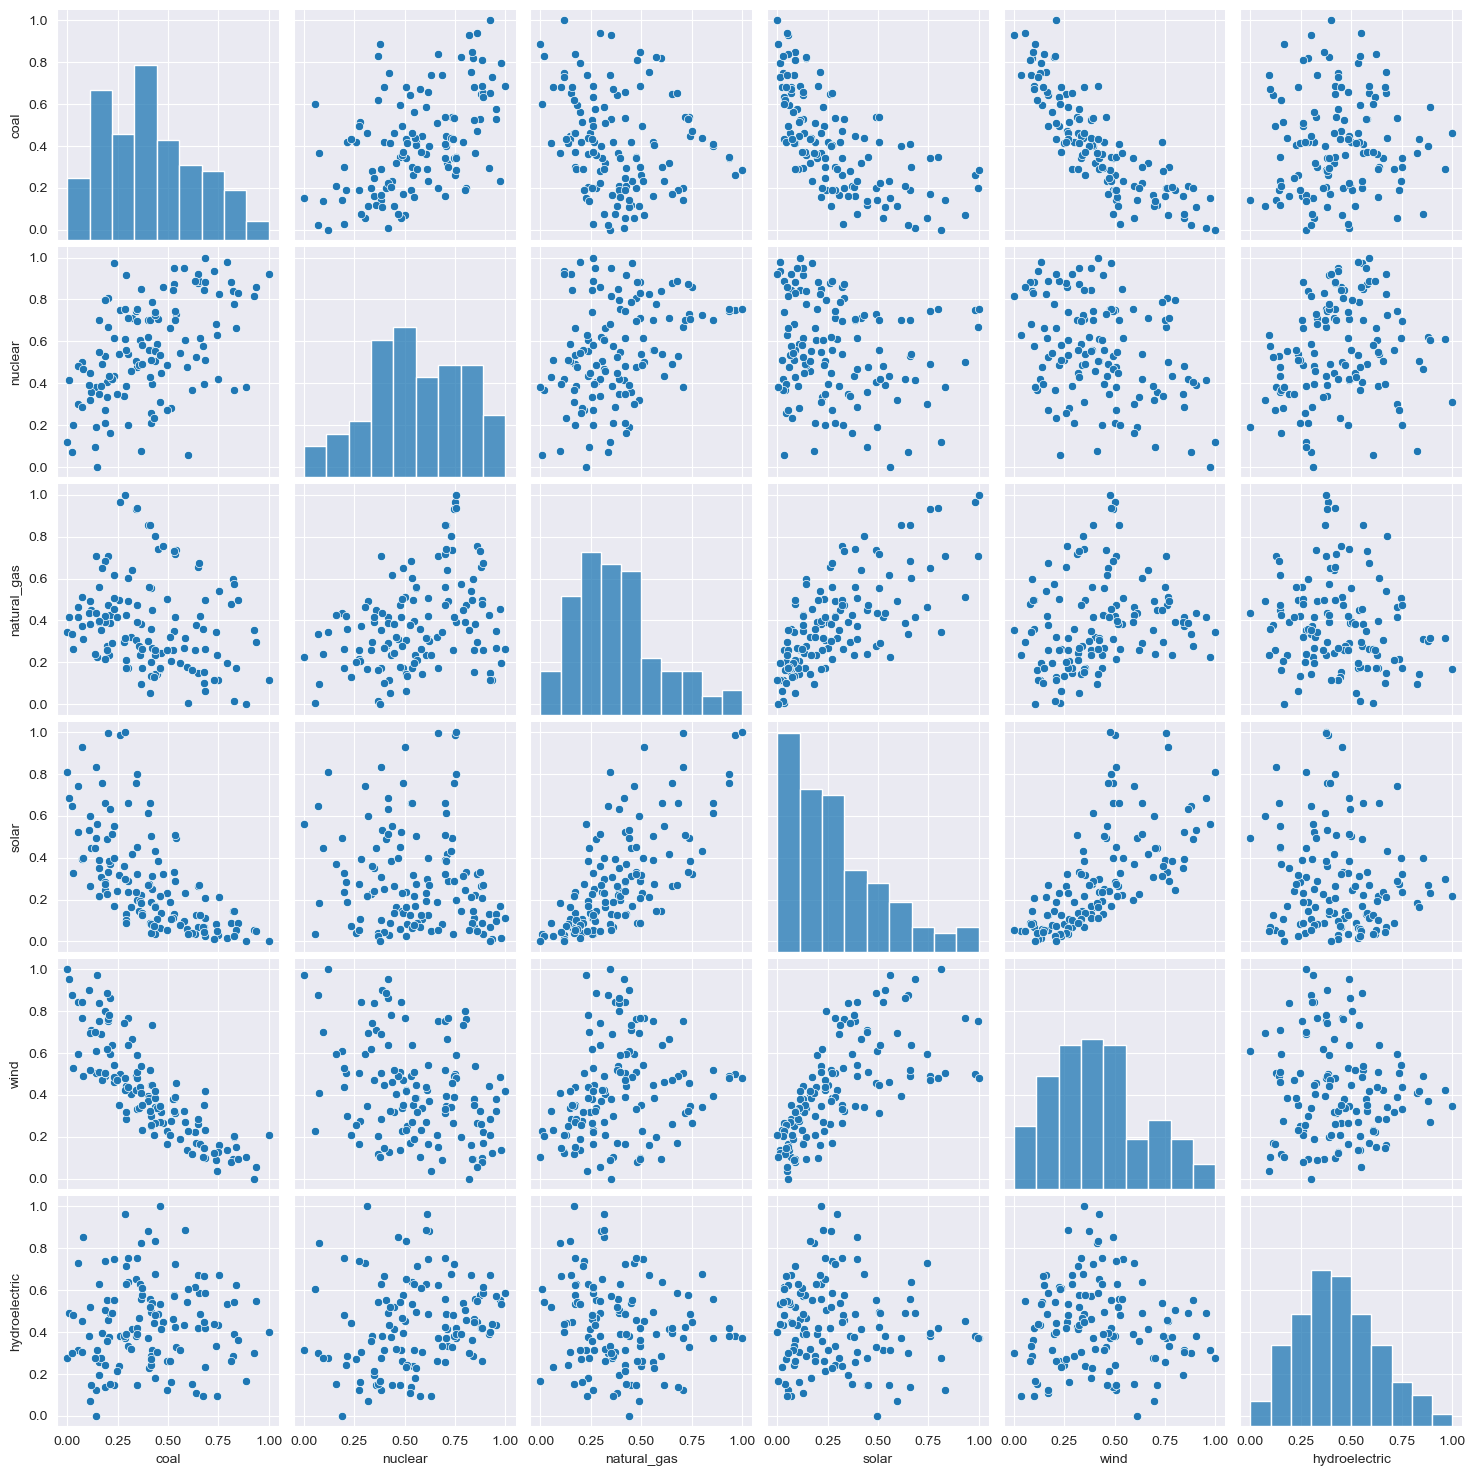

In [9]:
sns.pairplot(eia_df[energy_sources])
plt.show()

**Target Relationship**  
*Natural Gas and Nuclear*: Primary contributors to utility-scale fuel consumption, indicated by strong positive correlations.

*Coal and Renewables (Solar, Hydroelectric, Wind)*: Play secondary roles with weaker positive correlations.

## Final Thoughts ##  
The current results show a significant move away from certain energy production methods, and a move towards others. This may be due to the amount of electricity produced by these methods, but also may be due to other factors. Further analysis will analyze the type of energy most consumed by month, and season. There are several variables that may need to be considered as well, such as factory closures and energy output. For example, while there are less nuclear power plants compared to most other types, they also produce a significantly larger amount of energy, which may effect the consumption rates.


In [16]:
from sklearn.model_selection import train_test_split

print(eia_df.columns)
# Define the target variable and features
X = eia_df[['Month', 'coal', 'nuclear', 'natural_gas', 'solar', 'wind', 'hydroelectric']]  # Features
y = eia_df['all_fuels']  # Replace 'all_fuels' with the actual column name for total energy usage

# Extract features from the 'Month' column
eia_df['Month'] = pd.to_datetime(eia_df['Month'])
eia_df['month'] = eia_df['Month'].dt.month
eia_df['year'] = eia_df['Month'].dt.year
eia_df['day_of_week'] = eia_df['Month'].dt.dayofweek

# Define the updated features including the new date-based columns
X = eia_df[['month', 'year', 'day_of_week', 'coal', 'nuclear', 'natural_gas', 'solar', 'wind', 'hydroelectric']]
y = eia_df['all_fuels']  # Replace 'all_fuels' with the actual column name for total energy usage

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Index(['Month', 'all_fuels', 'coal', 'natural_gas', 'nuclear', 'hydroelectric',
       'wind', 'solar'],
      dtype='object')


In [22]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

# Print the coefficients and intercept
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)


Coefficients: [-2.23559762e-04 -9.99936983e-04  6.02695001e-05  8.17179738e-01
  1.34875583e-01  8.74777548e-01  1.46518615e-01  2.55889864e-01
  1.22099439e-01]
Intercept: 1.4961000720023234


## Model Observations ##

Month: -2.23559762e-04

Year: -9.99936983e-04

Day of the Week: 6.02695001e-05

Coal: 8.17179738e-01

Nuclear: 1.34875583e-01

Natural Gas: 8.74777548e-01

Solar: 1.46518615e-01

Wind: 2.55889864e-01

Hydroelectric: 1.22099439e-01

Interpretation of Coefficients:
Negative Coefficients:

Month (-2.23559762e-04): A slight decrease in all_fuels energy usage as the month increases.

Year (-9.99936983e-04): A slight decrease in all_fuels energy usage as the year increases.

Positive Coefficients:

Day of the Week (6.02695001e-05): A very minimal increase in all_fuels energy usage as the day of the week changes.

Coal (8.17179738e-01): A significant positive impact on all_fuels energy usage. As the usage of coal increases, all_fuels energy usage increases significantly.

Nuclear (1.34875583e-01): A moderate positive impact on all_fuels energy usage.

Natural Gas (8.74777548e-01): Another significant positive impact on all_fuels energy usage, similar to coal.

Solar (1.46518615e-01): A moderate positive impact on all_fuels energy usage.

Wind (2.55889864e-01): A moderate positive impact on all_fuels energy usage.

Hydroelectric (1.22099439e-01): A moderate positive impact on all_fuels energy usage.

Intercept:
Intercept (1.4961000720023234):

Interpretation: In this case, when all the feature values are zero, the base energy usage for all_fuels is approximately 1.4961.

In [20]:
from sklearn.model_selection import GridSearchCV

# Define a parameter grid without 'normalize'
param_grid = {'fit_intercept': [True, False], 'copy_X': [True, False]}
grid_search = GridSearchCV(LinearRegression(), param_grid, cv=5)
grid_search.fit(X_train, y_train)

print("Best Parameters:", grid_search.best_params_)


Best Parameters: {'copy_X': True, 'fit_intercept': False}


In [21]:
from sklearn.metrics import mean_squared_error, r2_score

y_pred = grid_search.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r2)


Mean Squared Error: 3.3883119028960354e-05
R-squared: 0.9990002897101941


## Observations ##
Mean Squared Error (MSE):
Value: 3.3883119028960354e-05

Interpretation: A very low MSE indicates the model's predictions are very close to the actual values. Given that the MSE is extremely low, it suggests that the model is performing exceptionally well in terms of accuracy.

R-squared (R²):
Value: 0.9990002897101941

Interpretation: An R² value of 0.999 means that 99.9% of the variance in the target variable is explained by the model's features. This is an exceptionally high value, indicating that the model fits the data very well and has a high explanatory power.

# Milestone 4 Note #  
Re-formatted the code to improve information. I separated the energy types into two dataframes which has provided more detailed insight. I separated the energy types into "Natural" and "Renewable" dataframes. 